# Generalized Linear Models for Categorical Data (Lab 1)

### Intro and objectives


### In this lab you will learn:
1. examples of generalized linear models
2. how to fit these models in Python


## What I hope you'll get out of this lab
* The feeling that you'll "know where to start" when you need to fit generalized linear models
* Worked Examples
* How to interpret the results obtained

In [ ]:
!pip install statsmodels==0.13.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import statsmodels
statsmodels.__version__

'0.13.5'

In [ ]:
!pip install wooldridge

import wooldridge as woo
import statsmodels.formula.api as smf
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import numpy as np
from scipy import stats


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 25.3 MB/s eta 0:00:00


# Example.  Which species is it ?

#### Describe the iris dataset

In [ ]:
iris=sns.load_dataset('iris')

In [ ]:
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
iris["species"].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

### 1. Exploratory Data Analysis

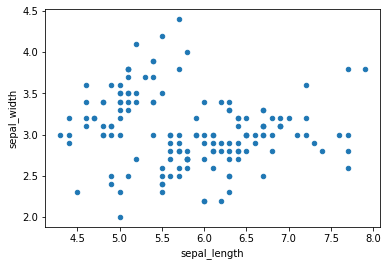

In [ ]:
# The first way we can plot things is using the .plot extension from Pandas dataframes
# We'll use this to make a scatterplot of the Iris features.
iris.plot(kind="scatter", x="sepal_length", y="sepal_width")

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


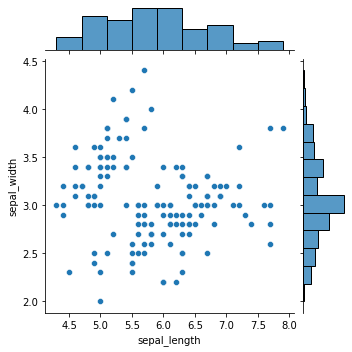

In [ ]:
# We can also use the seaborn library to make a similar plot
# A seaborn jointplot shows bivariate scatterplots and univariate histograms in the same figure
sns.jointplot(x="sepal_length", y="sepal_width", data=iris, size=5)


/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


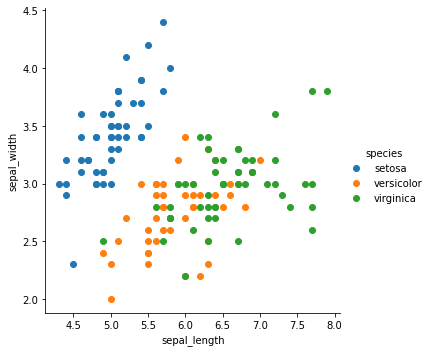

In [ ]:
# One piece of information missing in the plots above is what species each plant is
# We'll use seaborn's FacetGrid to color the scatterplot by species
sns.FacetGrid(iris, hue="species", size=5) \
   .map(plt.scatter, "sepal_length", "sepal_width") \
   .add_legend()


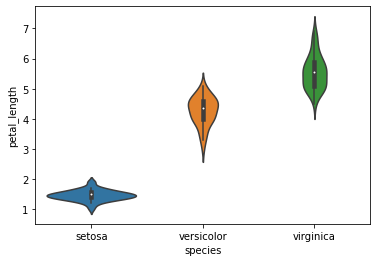

In [ ]:
# We can look at an individual feature in Seaborn through a boxplot
sns.violinplot(x="species", y="petal_length", data=iris)

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


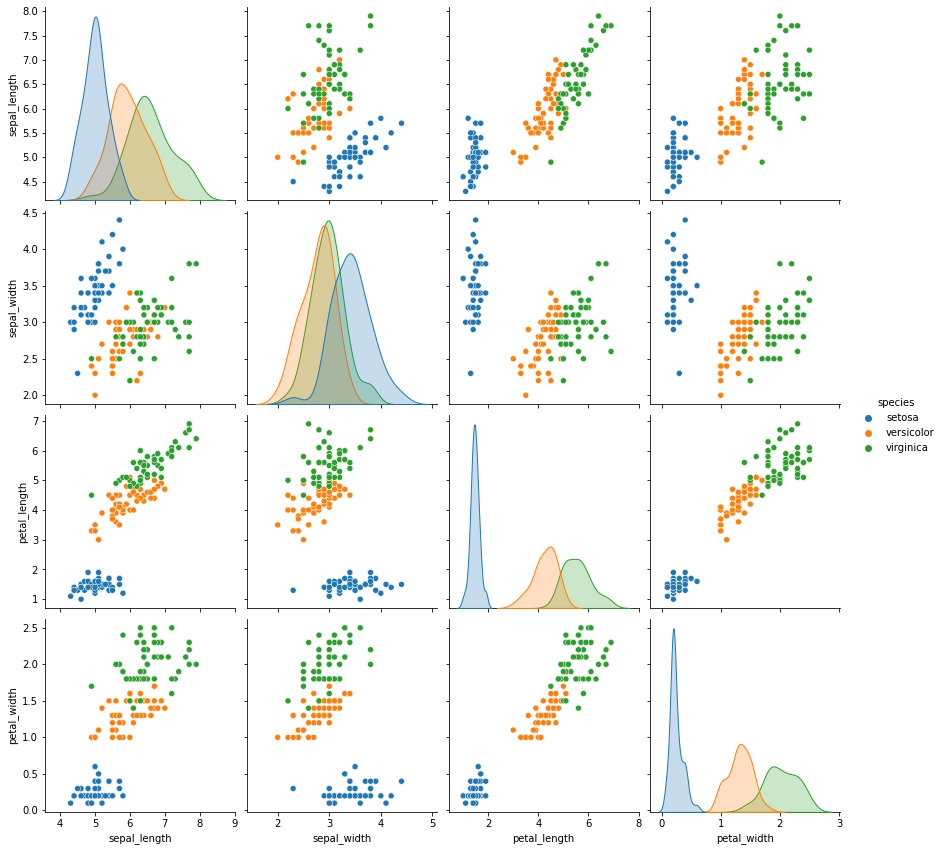

In [ ]:
# Another useful seaborn plot is the pairplot, which shows the bivariate relation
# between each pair of features
# 
# From the pairplot, we'll see that the Iris-setosa species is separataed from the other
# two across all feature combinations
sns.pairplot(iris, hue="species", size=3)

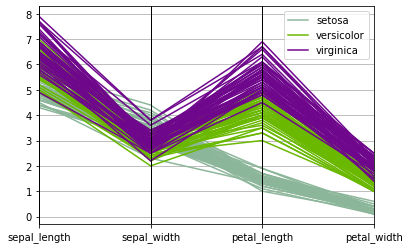

In [ ]:
# Another multivariate visualization technique pandas has is parallel_coordinates
# Parallel coordinates plots each feature on a separate column & then draws lines
# connecting the features for each data sample
from pandas.plotting import parallel_coordinates
parallel_coordinates(iris, "species")

#### We notice that low levels of petal_length and petal_width correspond to setosa species.

#### versicolor and virginica are harder to separate

## 1. Initial model 

#### We will assume that the random variable species is an categorical outcome with three categories: "setosa","versicolor","virginica".

####  We assume a multinomial distribution

####  $P(Y=j)$ is the probability of Y belonging to any of the three categories.

#### We assume a logit function, this means that we are assuming that the log odds of the probabilities of the response variable can be modeled as a linear combination of the factors under consideration. 
#### We select the category "vocational" as the base category, which gives two different equations:

$ logit(P(Y =academic))=log\frac{P(Y =academic)}{P(Y =vocational)}=\beta_0+\beta_1*x_1+\ldots+\beta_p*X_p $



$ logit(P(Y =general))=log\frac{P(Y =general)}{P(Y =vocational)}=\beta_0+\beta_1*x_1+\ldots+\beta_p*X_p $



## 2. Estimation of the parameters

#### Given the ordered nature of the response variable we fit an multinomial logit model,

In [ ]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
y=iris['species']

X=iris[['sepal_length',	'sepal_width'	,'petal_length',	'petal_width']]

In [ ]:
reg = sm.MNLogit(y, X)
reg_fit = reg.fit()
reg_fit.summary()






         Current function value: 0.072266
         Iterations: 35


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                species   No. Observations:                  150
Model:                        MNLogit   Df Residuals:                      142
Method:                           MLE   Df Model:                            6
Date:                Tue, 24 Jan 2023   Pseudo R-squ.:                  0.9342
Time:                        17:07:59   Log-Likelihood:                -10.840
converged:                      False   LL-Null:                       -164.79
Covariance Type:            nonrobust   LLR p-value:                 1.655e-63
=====================================================================================
species=versicolor       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
sepal_length          -6.2825   6.46e+04  -9.72e-05      1.000   -1.27e+05    1.27e+05
sepal_width          -10.3450   1.08e+05   -9.6e-05      1.000   -2.11e+05    2.11e+05
petal_length          19.5419      2e+05   9.77e-05      1.000   -3.92e+05    3.92e+05
petal_width           19.6131   4.09e+05    4.8e-05      1.000   -8.01e+05    8.01e+05
--------------------------------------------------------------------------------------
species=virginica       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
sepal_length        -12.6102   6.46e+04     -0.000      1.000   -1.27e+05    1.27e+05
sepal_width         -16.9631   1.08e+05     -0.000      1.000   -2.11e+05    2.11e+05
petal_length         27.9757      2e+05      0.000      1.000   -3.92e+05    3.92e+05
petal_width          29.8956   4.09e+05   7.32e-05      1.000   -8.01e+05    8.01e+05
=====================================================================================
"""

In [ ]:
reg_fit.params

,0,1
sepal_length,-6.282495,-12.610215
sepal_width,-10.344958,-16.963144
petal_length,19.541863,27.975665
petal_width,19.613078,29.895622


#### In the case of categorical responses it is easier to interpret the results in terms of odds ratios, rather than log of odds ratios

#### We compute the exponential of the coefficients

In [ ]:
odds=np.exp(reg_fit.params)
odds.rename(columns={0:'versicolor',1:'virginica'},inplace=True)
odds.round(1)

,versicolor,virginica
sepal_length,0.0,0.000000e+00
sepal_width,0.0,0.000000e+00
petal_length,306848110.3,1.411487e+12
petal_width,329496975.8,9.627279e+12


## 3. Model interpretation:

#### Based on the previous results.

#### 1. Large levels of petal_length and petal_width increase the odds of being versicolor (against setosa, the base category)


#### 2. Large levels of petal_length and petal_width increase the odds of being virginica (against setosa, the base category)

###4. Ex-post Analysis

#### based on the results of the  model we conclude that higher GPAs, parents with education and having studied in a private school increase the odds of applying to college.

In [ ]:
Y_predicted=reg_fit.predict(X)
Y_predicted.rename(columns={0:"Setosa",1:"Versicolor",2:"Virginica"},inplace=True)

In [ ]:
Y_predicted

,Setosa,Versicolor,Virginica
0,1.000000e+00,8.820626e-17,7.786826e-35
1,1.000000e+00,5.464734e-14,4.679180e-30
2,1.000000e+00,3.435704e-15,1.194295e-31
3,1.000000e+00,9.026544e-13,6.185880e-28
4,1.000000e+00,5.875826e-17,5.038661e-35
...,...,...,...
145,5.639283e-35,5.192477e-03,9.948075e-01
146,3.166149e-33,4.987891e-03,9.950121e-01
147,3.463117e-32,3.118552e-02,9.688145e-01
148,3.402717e-37,5.760823e-04,9.994239e-01


In [ ]:
irisPredictions=pd.concat([iris,Y_predicted],axis=1)

In [ ]:
irisPredictions.round(2)

,sepal_length,sepal_width,petal_length,petal_width,species,Setosa,Versicolor,Virginica
0,5.1,3.5,1.4,0.2,setosa,1.0,0.00,0.00
1,4.9,3.0,1.4,0.2,setosa,1.0,0.00,0.00
2,4.7,3.2,1.3,0.2,setosa,1.0,0.00,0.00
3,4.6,3.1,1.5,0.2,setosa,1.0,0.00,0.00
4,5.0,3.6,1.4,0.2,setosa,1.0,0.00,0.00
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,0.0,0.01,0.99
146,6.3,2.5,5.0,1.9,virginica,0.0,0.00,1.00
147,6.5,3.0,5.2,2.0,virginica,0.0,0.03,0.97
148,6.2,3.4,5.4,2.3,virginica,0.0,0.00,1.00


### 4.1. Let's explore the impact of the different factors on species

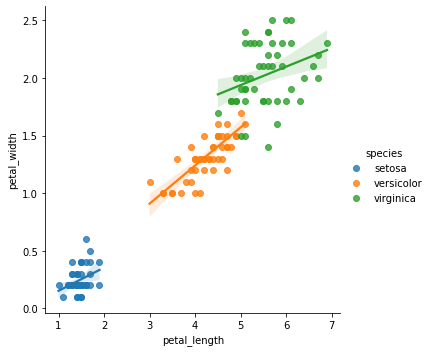

In [ ]:
sns.lmplot(data=irisPredictions, x='petal_length',y='petal_width',hue='species')

#### We notice, from the previous figure, that petal length and petal width are useful factors to separate species 

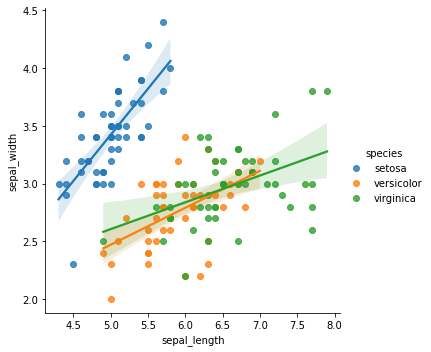

In [ ]:
sns.lmplot(data=irisPredictions, x='sepal_length',y='sepal_width',hue='species')

#### We notice, from the previous figure, that the combination of low sepal_length and large sepal_width is strongly related to setosa

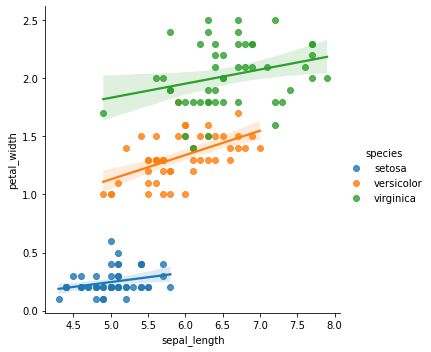

In [ ]:
sns.lmplot(data=irisPredictions, x='sepal_length',y='petal_width',hue='species')

#### We observe, from the previous figure that both sepal_length and petal_width are useful features to separate species

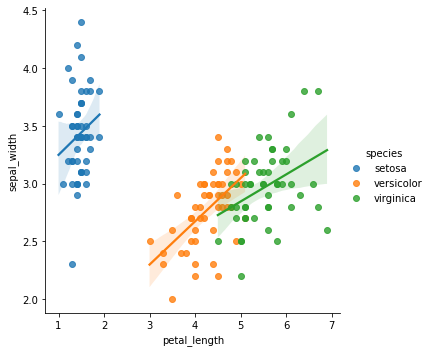

In [ ]:
sns.lmplot(data=irisPredictions, x='petal_length',y='sepal_width',hue='species')